# Resampling and Interpolation

You may have observations at the wrong frequency. Maybe they are too granular or not granular enough. The Pandas library in Python provides the capability to change the frequency of your time series data. In this tutorial, you will discover how to use Pandas in Python to both increase and decrease the sampling frequency of time series data.

### Resampling

Resampling involves changing the frequency of your time series obvesrations. The two types of resampling are:
- Upsampling
- Downsampling

In both cases, data must be invented. In the case of upsampling, care may be needed in determining how the fine-grained observations are calculated using interpolation. In the case of downsampling, care may be needed in selecting the summary statistics used to calculate the new aggregated values.

Two reasons why you may be interesting in resampling your time series:
- Problem Framing: Resampling may be required if your data is available at the same
frequency that you want to make predictions.
- Feature Engineering: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.


# Upsampling Data

The observations in the Shampoo Sales are monthly. Imagine we wanted daily sales information. We would have to upsample the frequency from monthly to daily and use an interpolation scheme to fill in the new daily frequency. The Pandas library provides a function called resample() on the Series and DataFrame objects1. This can be used to group records when downsampling and making space for new observations when upsampling.

We can use this function to transform our monthly dataset into a daily dataset by calling resampling and specifying the preferred frequency of calendar day frequency or D. Pandas is clever and you could just as easily specify the frequency as 1D or even something domain specific, such as 5D.

In [54]:
# Upsample to daily intervals
import pandas as pd
from pandas import read_csv
from pandas import datetime

def parser(x):
    try:  
        return datetime.strptime('190'+x, '%Y-%m')
    except:
        return pd.NaT

series = read_csv("shampoo.csv", header=0, parse_dates=[0],
                  index_col = 0, squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean()
print(upsampled.head(32))

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Name: Sales of shampoo over a three year period, dtype: float64


Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
Name: Sales of shampoo over a three year period, dtype: float64


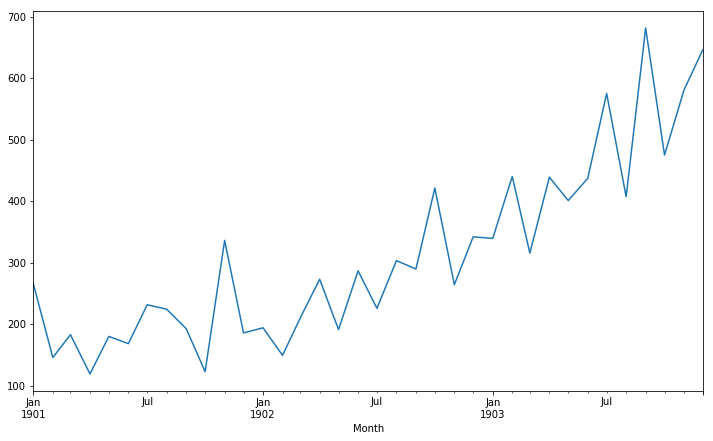

In [68]:
# Upsample to daily intervals
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as pt
#%pylab inline
#pylab.rcParams['figure.figsize'] = (12,7)

def parser(x):
    try:  
        return datetime.strptime('190'+x, '%Y-%m')
    except:
        return pd.NaT

series = read_csv("shampoo.csv", header=0, parse_dates=[0],
                  index_col = 0, squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(10))
interpolated.plot()
pt.show()

### Polynomial or Spline Interpolation Methods

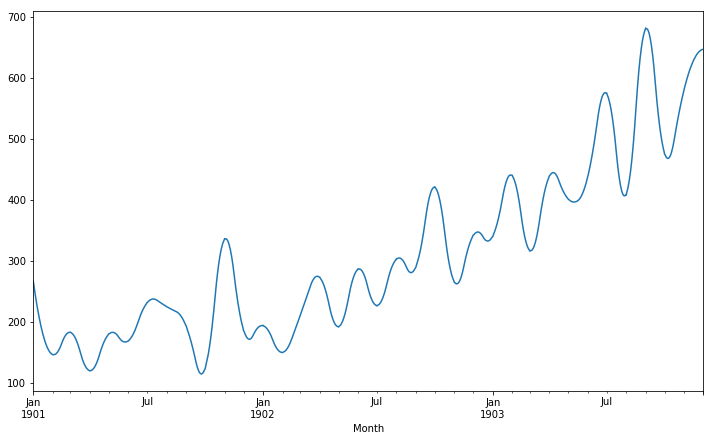

In [69]:
# upsample to daily intervals with spline interpolation 
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as pt

def parser(x):
    try:  
        return datetime.strptime('190'+x, '%Y-%m')
    except:
        return pd.NaT

series = read_csv("shampoo.csv", header=0, parse_dates=[0],
                  index_col = 0, squeeze=True, date_parser=parser)

upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='spline', order=2)
#print(interpolated.head(32))
interpolated.plot()
pt.show()

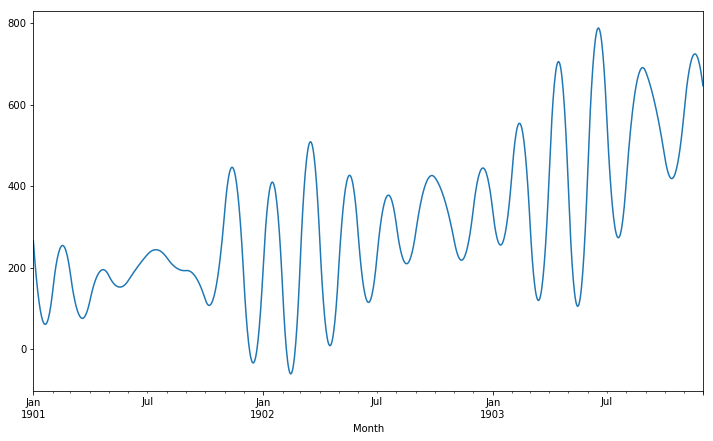

In [70]:
# upsample to daily intervals with Polynomial interpolation 
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as pt

def parser(x):
    try:  
        return datetime.strptime('190'+x, '%Y-%m')
    except:
        return pd.NaT

series = read_csv("shampoo.csv", header=0, parse_dates=[0],
                  index_col = 0, squeeze=True, date_parser=parser)

upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='polynomial', order=2)
#print(interpolated.head(32))
interpolated.plot()
pt.show()

# Downsampling Data

The sales data is monthly, but perhaps we would prefer the data to be quarterly. The year can be divided into 4 business quarters, 3 months a piece. Instead of creating new rows between existing observations, the resample() function in Pandas will group all observations by the new frequency.

We could use an alias like 3M to create groups of 3 months, but this might have trouble if our observations did not start in January, April, July, or October. Pandas does have a quarter-aware alias of Q that we can use for this purpose. We must now decide how to create a new quarterly value from each group of 3 records. A good starting point is to calculate the average monthly sales numbers for the quarter. For this, we can use the mean() function.

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Name: Sales of shampoo over a three year period, dtype: float64


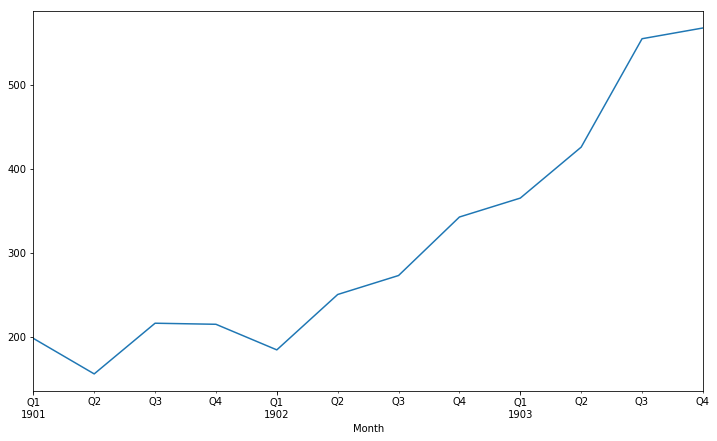

In [72]:
#Downsample to quarterly intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    try:  
        return datetime.strptime('190'+x, '%Y-%m')
    except:
        return pd.NaT

series = read_csv("shampoo.csv", header=0, parse_dates=[0],
                  index_col = 0, squeeze=True, date_parser=parser)
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Name: Sales of shampoo over a three year period, dtype: float64


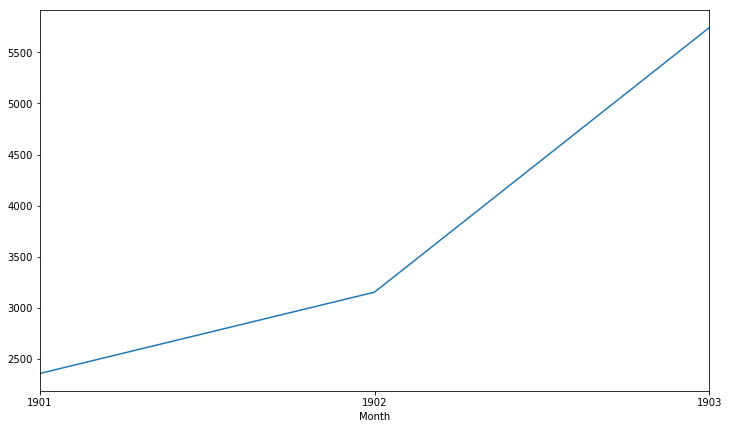

In [73]:
# Downsample to yearly intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    try:  
        return datetime.strptime('190'+x, '%Y-%m')
    except:
        return pd.NaT

series = read_csv("shampoo.csv", header=0, parse_dates=[0],
                  index_col = 0, squeeze=True, date_parser=parser)

resample = series.resample('A')
yearly_total_sales = resample.sum()
print(yearly_total_sales.head())
yearly_total_sales.plot()
pyplot.show()
